# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>



In [48]:
%matplotlib inline  
#sử dụng thay cho pt.show()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# <font color="red">B1:Đọc DATA và khám phá dữ liệu </font>

In [49]:
df = pd.read_csv('DATA/housing.csv')
# Đọc data

In [50]:
df.head(15)
#Hiển thị 15 dòng đầu

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [51]:
df.info()
#Hiển thị thông tin tập dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
df.keys()
# Những feature của tập dữ liệu

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [53]:
df.describe()
# Thống kê mô tả về tập dữ liệu

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [54]:
df.shape
# kích thước dữ liệu

(20640, 10)

In [55]:
df.dtypes
#Kiểu dữ liệu của từng feature

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [56]:
df.isnull().sum()
#check missing value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Ta thấy total_bedrooms chứa missing value, vậy sẽ lấp nó bằng mode, tần suất xuất hiện

In [57]:
#Xử lý missing value với cột age
mode_total_bedrooms = df['total_bedrooms'].mode()[0]
df['total_bedrooms'].fillna(mode_total_bedrooms, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [58]:
df.isnull().sum()
#check missing value lại sau khi đã lấp

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Bây giờ dữ liệu đã không bị thiếu

In [59]:
print(df['ocean_proximity'], ' chứa ', len(df['ocean_proximity'].unique()), ' nhãn')
# Kiểm tra số nhãn trong dữ liệu dạng chữ

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object  chứa  5  nhãn


Với dữ liệu dạng chữ, ta chuyển về dạng số bằng dummy

In [60]:
# mã hóa biến category, chuyển về dạng 0-1 thay vì true-false
df_encode = pd.get_dummies(df['ocean_proximity']).astype(int)
df_encode

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [61]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Bây giờ, chúng ta sẽ xóa cột ocean_proximity trong df rồi gắn df_encode vào df sau khi xóa để được 1 dataframe mới chỉ chứa số

In [62]:
df_new = pd.concat([df.drop(['ocean_proximity'], axis=1), df_encode], axis=1)
df_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [63]:
df_new.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               int32
INLAND                  int32
ISLAND                  int32
NEAR BAY                int32
NEAR OCEAN              int32
dtype: object

### <font color = 'yellow' >Trong tập dữ liệu này, giá trị đầu vào là các cột trừ cột median_house_value, còn cột giá trị dự báo là median_house_value<font>

In [64]:
X = df_new.drop(['median_house_value'], axis=1)
y = df_new["median_house_value"]

In [65]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [66]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Ta thấy dữ liệu đã được chuyển về trong khoảng 0-1

C:\Users\duc\AppData\Local\Temp\ipykernel_19500\3094404935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='median_house_value', ylabel='Density'>

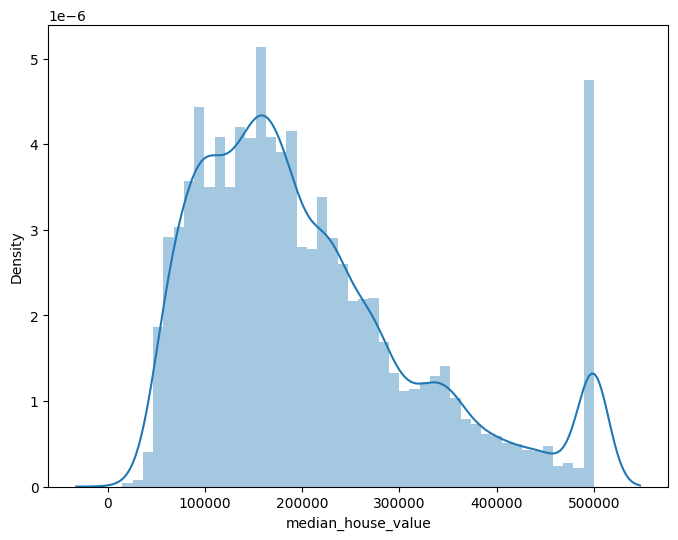

In [67]:
plt.figure(figsize=(8, 6))
sns.distplot(y)
# Biểu đồ cột thể hiện giá nhà

<Axes: >

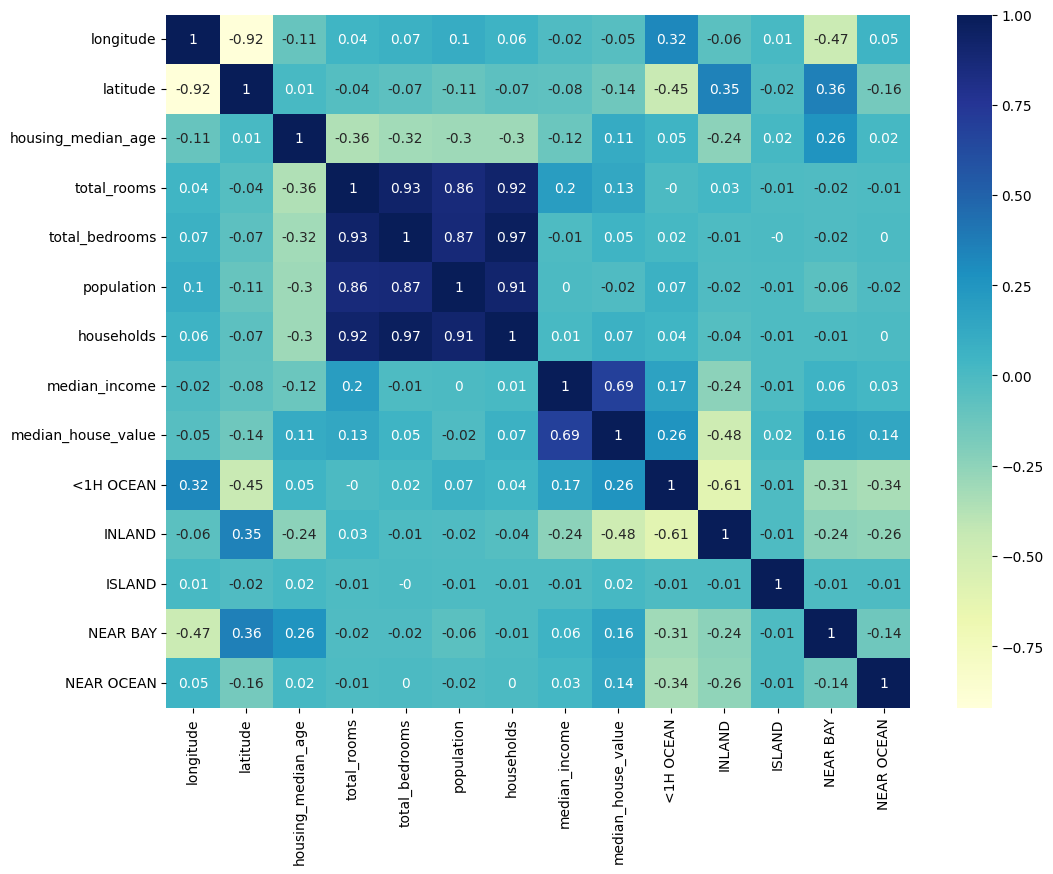

In [68]:
plt.figure(figsize=(12, 9))
correlation_matrix = df_new.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
# Biểu đồ tương quan giữa các cột (feature)

### <font color = 'yellow'>Chia dữ liệu : Train , Test ( X_train, Y_train, X_test, Y_test)<font>

In [69]:
#Sử dụng `train_test_split` để chia dữ liệu thành các tập con kiểm tra và huấn luyện ngẫu nhiên.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
#Tỷ lệ 80% train, 20% test

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(16512, 13)
(4128, 13)
(16512,)
(4128,)


In [71]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,0,0,0,0,1
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,0,0,0,0,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,0,0,0,0,1
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,0,0,0,0,1
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,0,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1,0,0,0,0


In [72]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,280.0,1392.0,359.0,1.6812,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,280.0,1565.0,584.0,2.5313,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,280.0,1310.0,963.0,3.4801,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,280.0,1705.0,495.0,5.7376,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,280.0,1063.0,428.0,3.7250,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,1,0,0,0,0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,0,0,0,0,1
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,1,0,0,0,0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,0,1,0,0,0


In [73]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [74]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

Chuẩn hóa X_train và X_test theo min_max

In [75]:
# Chuẩn hóa Min_Max_Scaler cho từng tập dữ liệu X( đầu vào) 

from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train_scaler = minmax_scale.fit_transform(X_train)
# Lưu mô hình chuẩn hóa vào tệp "minmax_scaler_x.pkl" bằng pickle
import pickle
with open("minmax_scaler_x.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)

X_train_scaler

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.        , 0.        ,
        1.        ],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.        , 0.        ,
        1.        ],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.19223108, 0.55531915, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [76]:
X_test_scaler = minmax_scale.transform(X_test)
X_test_scaler

array([[0.53187251, 0.37340426, 0.47058824, ..., 0.        , 0.        ,
        0.        ],
       [0.48705179, 0.27553191, 0.56862745, ..., 0.        , 0.        ,
        0.        ],
       [0.19023904, 0.55851064, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22908367, 0.50638298, 0.47058824, ..., 0.        , 0.        ,
        0.        ],
       [0.45717131, 0.44893617, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.59561753, 0.17765957, 0.31372549, ..., 0.        , 0.        ,
        0.        ]])

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [77]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train_scaler, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [79]:
y_pred = model.predict(X_test_scaler) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train_scaler)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)


In [80]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 4683435883.527434
R-squared (R2) Score: 0.6496475000697288
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 4935801537.4234495
R-squared (R2) Score: 0.6233388492156626


In [81]:
print(y_test)

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64


In [82]:
print(y_pred)
print(type(y_pred))

[ 38528. 108288. 238720. ... 438656. 121088. 183168.]
<class 'numpy.ndarray'>


In [83]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
20046,47700.0,38528.0
3024,45800.0,108288.0
15663,500001.0,238720.0
20484,218600.0,251648.0
9814,278000.0,246784.0
13311,158700.0,124032.0
7113,198200.0,274304.0
7668,157500.0,211968.0
18246,340000.0,240256.0
5723,446600.0,391552.0


<Axes: >

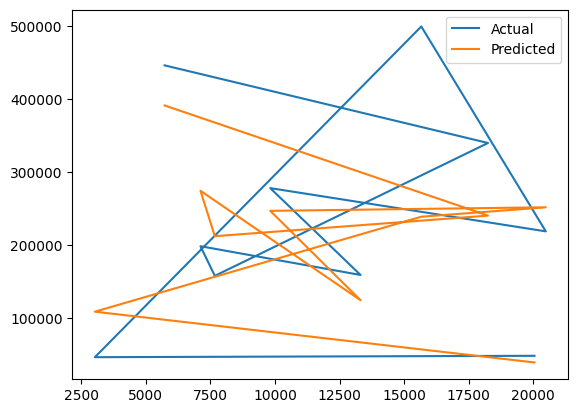

In [84]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

## <font color = "green"> Ta thấy mô hình cũng chưa được tốt lắm, bây giờ sẽ thử sử dụng phương pháp feature selection<font>

In [85]:
# tạo 1 biến mới để sao lưu lại dữ liệu từ tập đầu vào và đầu ra
X_new = X
y_new = y


In [86]:
#kiểm tra số feature của X_new
feature_X_new = X_new.shape[1]
feature_X_new

13

In [87]:
from sklearn.feature_selection import SelectKBest, f_regression
list_feature = []

for i in range(1,feature_X_new):
    k_best = SelectKBest(score_func=f_regression, k= i) #chon ra cac dac trung tot nhat
                                                        # dua vao k
    X_select = k_best.fit_transform(X_new, y_new)
    best_feature_names = X_new.columns[k_best.get_support()]
    # print("Best Features:", best_feature_names)
    list_feature.append(best_feature_names)

##print("list:",list_feature) # list dac trung ma ben trong co cac phan tu la 1 object

def all_result(best_feature_names,X_new, y_new):
    x = X_new[best_feature_names] # tạo biến dựa theo từng cột features đã chọn
    y = y_new

    x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=42) #chia dữ liệu
    
    scaler = MinMaxScaler()
    x_train_2 = scaler.fit_transform(x_train_2)
    x_test_2 = scaler.transform(x_test_2)

    re_2feature = LinearRegression()
    re_2feature.fit(x_train_2, y_train_1)

    y_test_perdict = re_2feature.predict(x_test_2) # dự đoán trên tập kiểm tra ( cái này là validation)
    Y_train_predict = re_2feature.predict(x_train_2) # dự đoán trên tập học ( cái này là train)
    rate(y_test_1,y_test_perdict,y_train_1,Y_train_predict)    # gọi hàm đánh giá và truyền tham số

for i in list_feature:
    print(i)
    print(all_result(i, X_new, y_new))

Index(['median_income'], dtype='object')
--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 6991447170.182823
R-squared (R2) Score: 0.4769927345820525
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 7091157771.76555
R-squared (R2) Score: 0.45885918903846656
None
Index(['median_income', 'INLAND'], dtype='object')
--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 5528044369.746969
R-squared (R2) Score: 0.5864651053560289
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 5655074238.499041
R-squared (R2) Score: 0.5684496723999524
None
Index(['median_income', '<1H OCEAN', 'INLAND'], dtype='object')
--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 5474722755.191887
R-squared (R2) Score: 0.5904539207096025
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 5573094021.589816
R-squared (R2) Score: 0.5747057510952673
None
Index(['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY'], dtype='object')
---

### Ta thấy lựa chọn tất cả features vẫn đạt được chỉ số khả quan nhất

# <font color="red">5:Thử bằng mô hình khác</font>

In [88]:
X_train_scaler

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.        , 0.        ,
        1.        ],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.        , 0.        ,
        1.        ],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.19223108, 0.55531915, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [89]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [90]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [91]:
forest.score(X_test_scaler, y_test)

0.8177327830855107

In [92]:
y_pred_forest = forest.predict(X_test_scaler) #dự báo y_pred dựa trên tập x_test
y_pred_train_forest = forest.predict(X_train_scaler)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate_forest(y_test, y_pred_forest,y_train,y_pred_train_forest):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train_forest)
    r2_train = r2_score(y_train, y_pred_train_forest)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred_forest)
    r2 = r2_score(y_test, y_pred_forest)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

rate(y_test, y_pred_forest,y_train,y_pred_train_forest)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 329294080.00370425
R-squared (R2) Score: 0.9753665883315896
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 2388445974.837284
R-squared (R2) Score: 0.8177327830855107


# <font color="red">6:Cải thiện mô hình hồi quy tuyến tính </font>

Phương pháp cải thiện: dùng tensorflow

In [99]:

import tensorflow as tf
# Build the model

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='linear'),
  tf.keras.layers.Dense(5, activation='linear'),
  tf.keras.layers.Dense(1, activation='linear')                     
])

# Compile the model

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.MSE,
                metrics=['mse'])

# Fit the model

history_1 = model_1.fit(X_train_scaler, y_train, epochs=5)

Epoch 1/5
516/516 [==============================] - 1s 919us/step - loss: 56272826368.0000 - mse: 56272826368.0000
Epoch 2/5
516/516 [==============================] - 1s 1ms/step - loss: 55968993280.0000 - mse: 55968993280.0000
Epoch 3/5
516/516 [==============================] - 0s 825us/step - loss: 55017603072.0000 - mse: 55017603072.0000
Epoch 4/5
516/516 [==============================] - 0s 835us/step - loss: 53224280064.0000 - mse: 53224280064.0000
Epoch 5/5
516/516 [==============================] - 0s 813us/step - loss: 50547949568.0000 - mse: 50547949568.0000


In [100]:
model_1.evaluate(X_test_scaler, y_test)

129/129 [==============================] - 0s 883us/step - loss: 48030941184.0000 - mse: 48030941184.0000


[48030941184.0, 48030941184.0]

In [101]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (32, 10)                  140       
                                                                 
 dense_25 (Dense)            (32, 5)                   55        
                                                                 
 dense_26 (Dense)            (32, 1)                   6         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
history_1.history

{'loss': [56272826368.0,
  55968993280.0,
  55017603072.0,
  53224280064.0,
  50547949568.0],
 'mse': [56272826368.0,
  55968993280.0,
  55017603072.0,
  53224280064.0,
  50547949568.0]}

Text(0.5, 1.0, 'Mean Square Error')

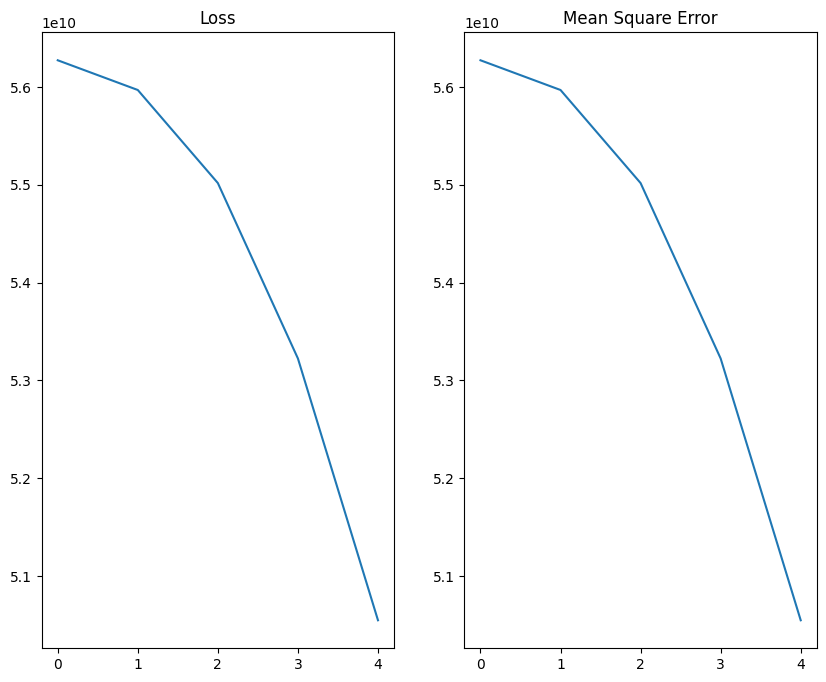

In [105]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history_1.history['mse'])
plt.title('Mean Square Error')

In [125]:
# Build model 2 

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation='linear'),
  # tf.keras.layers.Dense(10, activation='linear'),
  # tf.keras.layers.Dense(20, activation='linear'),
  tf.keras.layers.Dense(4, activation='linear'),
  tf.keras.layers.Dense(4, activation='linear'),
  tf.keras.layers.Dense(1, activation='linear')                      
])

# Compile the model 

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.MSE,
                metrics=['mse'])
# Tạo learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 10**(epoch/20)) # xem xét một tập hợp các giá trị tốc độ học từ 1e-4, tăng 10**(epoch/20) mỗi epoch

# Fit the model 
history_2 = model_2.fit(X_train_scaler, y_train, epochs=20,callbacks=[lr_scheduler])

Epoch 1/20
516/516 [==============================] - 1s 1ms/step - loss: 24398759936.0000 - mse: 24398759936.0000 - lr: 0.0100
Epoch 2/20
516/516 [==============================] - 1s 996us/step - loss: 8165365248.0000 - mse: 8165365248.0000 - lr: 0.0112
Epoch 3/20
516/516 [==============================] - 0s 815us/step - loss: 6599759360.0000 - mse: 6599759360.0000 - lr: 0.0126
Epoch 4/20
516/516 [==============================] - 0s 863us/step - loss: 5441400832.0000 - mse: 5441400832.0000 - lr: 0.0141
Epoch 5/20
516/516 [==============================] - 0s 878us/step - loss: 5167976960.0000 - mse: 5167976960.0000 - lr: 0.0158
Epoch 6/20
516/516 [==============================] - 0s 870us/step - loss: 5093651456.0000 - mse: 5093651456.0000 - lr: 0.0178
Epoch 7/20
516/516 [==============================] - 0s 869us/step - loss: 5044267008.0000 - mse: 5044267008.0000 - lr: 0.0200
Epoch 8/20
516/516 [==============================] - 0s 834us/step - loss: 4982372352.0000 - mse: 49823

In [129]:
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

# Định nghĩa callback để tính R2 Score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val)
        r2 = r2_score(self.y_val, y_pred)
        print(f"Epoch {epoch + 1}, R2 Score: {r2:.4f}")

# Build model
model_2 = tf.keras.Sequential([
    Dense(100, activation='linear'),
    # Dense(20, activation='linear'),
    Dense(10, activation='linear'),
    Dense(10, activation='linear'),
    Dense(1, activation='linear')                      
])

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mse'])

# Tạo learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 10**(epoch/20))

# Tạo callback để tính R2 Score
r2_callback = R2ScoreCallback(X_val=X_test_scaler, y_val=y_test)

# Fit the model 
history_2 = model_2.fit(X_train_scaler, y_train, epochs=20, callbacks=[lr_scheduler, r2_callback])


Epoch 1/20
129/129 [==============================] - 0s 603us/steps: 16297787392.0000 - mse: 16297787392.
Epoch 1, R2 Score: 0.4736
516/516 [==============================] - 1s 1ms/step - loss: 15550662656.0000 - mse: 15550662656.0000 - lr: 0.0100
Epoch 2/20
129/129 [==============================] - 0s 663us/steps: 5764383232.0000 - mse: 5764383232.
Epoch 2, R2 Score: 0.5953
516/516 [==============================] - 1s 1ms/step - loss: 5683805696.0000 - mse: 5683805696.0000 - lr: 0.0112
Epoch 3/20
129/129 [==============================] - 0s 664us/steps: 5122867712.0000 - mse: 5122867712.
Epoch 3, R2 Score: 0.5932
516/516 [==============================] - 1s 1ms/step - loss: 5135115264.0000 - mse: 5135115264.0000 - lr: 0.0126
Epoch 4/20
129/129 [==============================] - 0s 907us/steps: 5019452928.0000 - mse: 501945292
Epoch 4, R2 Score: 0.6103
516/516 [==============================] - 1s 1ms/step - loss: 5029893120.0000 - mse: 5029893120.0000 - lr: 0.0141
Epoch 5/20
129